In [25]:
import numpy as np
import free_twopac as ftp 
import parser_scc2020 as pscc

In [26]:
def sphere(sample_size, ambient_dimension, vertical_noise=0):
    ''' Uniform point sample on a unit sphere with chi^2-distributed vertical offset. '''
    points = np.zeros((0, ambient_dimension))
    while points.shape[0] < sample_size:
        new_sample_size = sample_size-points.shape[0]
        new_points = np.random.random_sample(size=(new_sample_size, ambient_dimension)) * 2 - 1
        norms      = np.linalg.norm(new_points, axis=1)
        selection  = norms > 0.1
        points     = np.vstack((points, new_points[selection,:] / norms[selection, None]))
    noise = np.sqrt(np.random.chisquare(4, sample_size)) * vertical_noise
    points = points + noise[:, None] *points
    return points

def torus(num_points, major_radius, minor_radius):
    theta = 2 * np.pi * np.random.rand(num_points)
    phi = 2 * np.pi * np.random.rand(num_points)

    x = (major_radius + minor_radius * np.cos(phi)) * np.cos(theta)
    y = (major_radius + minor_radius * np.cos(phi)) * np.sin(theta)
    z = minor_radius * np.sin(phi)

    return np.array([x,y,z]).transpose()

points = torus(250, 0.5, 0.25)
grades = points.transpose()[1]

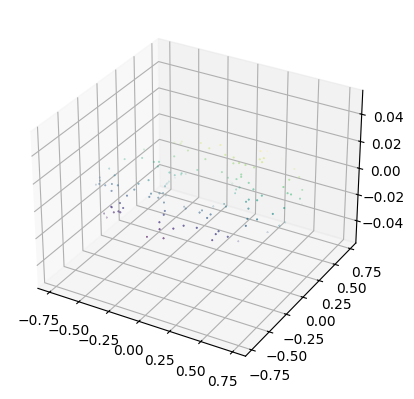

In [27]:
ftp.print_points(points,grades, "torus_frips/torus.png")

In [28]:
bd = ftp.fr_Hres(points,grades, 1)

pscc.scc2020_from_bdf(bd, "./torus_frips/torus_bdf_H1.txt")

Strong filtration domination reduction                                          
    Edges before: 31125
    Edges after: 5635 (18%)
  Strong filtration domination reduction                                             681ms
Assembling next coboundary matrix.                                              
    Number of 1-simplices: 5635
  Assembling next coboundary matrix.                                                   0ms
Chunk (cochain complex): minimize D^1                                           
    Minimize                                                                    
        Find local pairs                                                             0ms
        Input size: 5635x250; local pairs: 0; Output size: 5635x250
        Eliminate local entries.                                                     0ms
      Minimize                                                                         0ms
  Chunk (cochain complex): minimize D^1                                  